**Write a program to implementation of Fuzzy logic-based decision modelling for AC**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=0a25c63a1cf5d6b26f2c3663f9937a363260f76a4c8274fc59b21b970713b7ad
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
Recommended AC power: 85.92


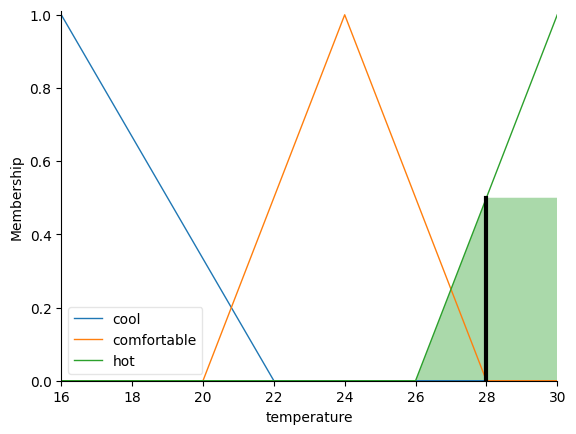

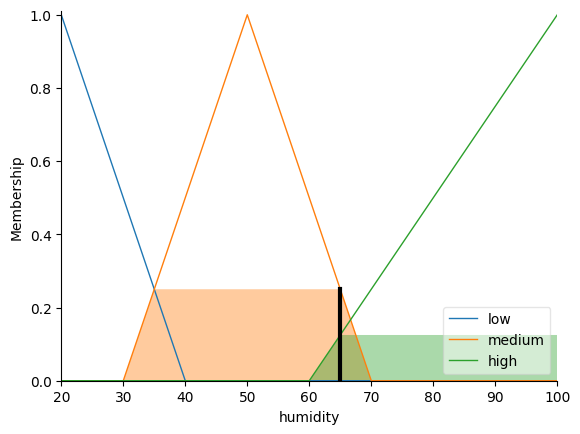

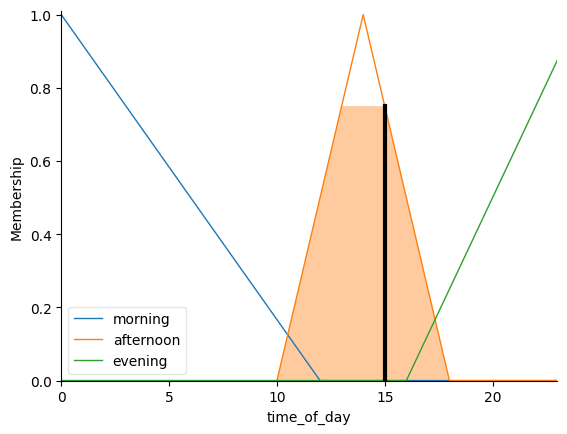

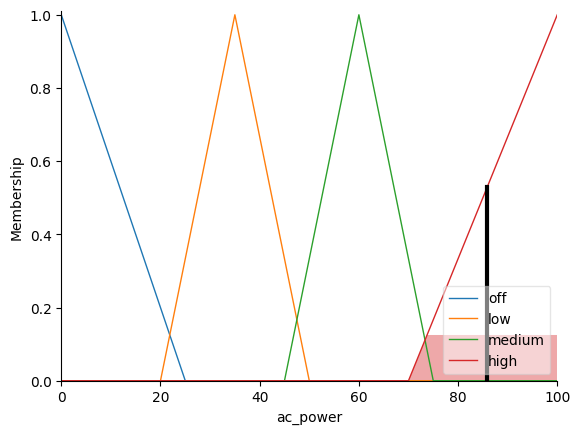

In [1]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the input variables
temperature = ctrl.Antecedent(np.arange(16, 31, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')
time_of_day = ctrl.Antecedent(np.arange(0, 24, 1), 'time_of_day')

# Define the output variable
ac_power = ctrl.Consequent(np.arange(0, 101, 1), 'ac_power')

# Define fuzzy membership functions for temperature
temperature['cool'] = fuzz.trimf(temperature.universe, [16, 16, 22])
temperature['comfortable'] = fuzz.trimf(temperature.universe, [20, 24, 28])
temperature['hot'] = fuzz.trimf(temperature.universe, [26, 30, 30])

# Define fuzzy membership functions for humidity
humidity['low'] = fuzz.trimf(humidity.universe, [20, 20, 40])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [60, 100, 100])

# Define fuzzy membership functions for time of day
time_of_day['morning'] = fuzz.trimf(time_of_day.universe, [0, 0, 12])
time_of_day['afternoon'] = fuzz.trimf(time_of_day.universe, [10, 14, 18])
time_of_day['evening'] = fuzz.trimf(time_of_day.universe, [16, 24, 24])

# Define fuzzy membership functions for AC power
ac_power['off'] = fuzz.trimf(ac_power.universe, [0, 0, 25])
ac_power['low'] = fuzz.trimf(ac_power.universe, [20, 35, 50])
ac_power['medium'] = fuzz.trimf(ac_power.universe, [45, 60, 75])
ac_power['high'] = fuzz.trimf(ac_power.universe, [70, 100, 100])

# Define the rules for the fuzzy system
rule1 = ctrl.Rule(temperature['cool'] & humidity['low'] & time_of_day['morning'], ac_power['off'])
rule2 = ctrl.Rule(temperature['cool'] & humidity['medium'] & time_of_day['morning'], ac_power['low'])
rule3 = ctrl.Rule(temperature['comfortable'] & humidity['low'] & time_of_day['afternoon'], ac_power['medium'])
rule4 = ctrl.Rule(temperature['hot'] & humidity['high'] & time_of_day['afternoon'], ac_power['high'])
rule5 = ctrl.Rule(temperature['hot'] & humidity['medium'] & time_of_day['evening'], ac_power['high'])
rule6 = ctrl.Rule(temperature['comfortable'] & humidity['medium'] & time_of_day['evening'], ac_power['low'])

# Create the control system
ac_control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
ac_control = ctrl.ControlSystemSimulation(ac_control_system)

# Example inputs to the system
ac_control.input['temperature'] = 28  # degrees Celsius
ac_control.input['humidity'] = 65     # percent
ac_control.input['time_of_day'] = 15  # 3 PM

# Compute the output
ac_control.compute()

# Print the result
print(f"Recommended AC power: {ac_control.output['ac_power']:.2f}")

# Optional: visualize the results
temperature.view(sim=ac_control)
humidity.view(sim=ac_control)
time_of_day.view(sim=ac_control)
ac_power.view(sim=ac_control)
